This is the implementation notebook for [this article](https://medium.com/p/5190581e40ea)

In [46]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
sns.set()

# Get the data from Yahoo Finance
ticker = '^SPX'
start_date = '2000-09-15'
end_date = '2021-10-02'
data = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [47]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-15,1480.869995,1480.959961,1460.219971,1465.810059,1465.810059,1268400000
2000-09-18,1465.810059,1467.770020,1441.920044,1444.510010,1444.510010,962500000
2000-09-19,1444.510010,1461.160034,1444.510010,1459.900024,1459.900024,1024900000
2000-09-20,1459.900024,1460.489990,1430.949951,1451.339966,1451.339966,1104000000
2000-09-21,1451.339966,1452.770020,1436.300049,1449.050049,1449.050049,1105400000
...,...,...,...,...,...,...
2021-09-27,4442.120117,4457.299805,4436.189941,4443.109863,4443.109863,4058650000
2021-09-28,4419.540039,4419.540039,4346.330078,4352.629883,4352.629883,4416550000
2021-09-29,4362.410156,4385.569824,4355.080078,4359.459961,4359.459961,3712660000


In [48]:
data = yf.download(ticker, start_date, end_date)['Adj Close']
df_spx = pd.DataFrame(data)
df_spx = df_spx.rename(columns={"Adj Close": "SPX"})
# define simple and log returns
df_spx['simple'] = df_spx['SPX'] / df_spx['SPX'].shift(1) - 1
df_spx['log'] = np.log(df_spx['SPX'] / df_spx['SPX'].shift(1))

[*********************100%%**********************]  1 of 1 completed


In [49]:
# drop na and show tail
df_spx = df_spx.dropna()
df_spx.tail()

,SPX,simple,log
Date,,,
2021-09-27,4443.109863,-0.002776,-0.002780
2021-09-28,4352.629883,-0.020364,-0.020574
2021-09-29,4359.459961,0.001569,0.001568
2021-09-30,4307.540039,-0.011910,-0.011981
2021-10-01,4357.040039,0.011491,0.011426


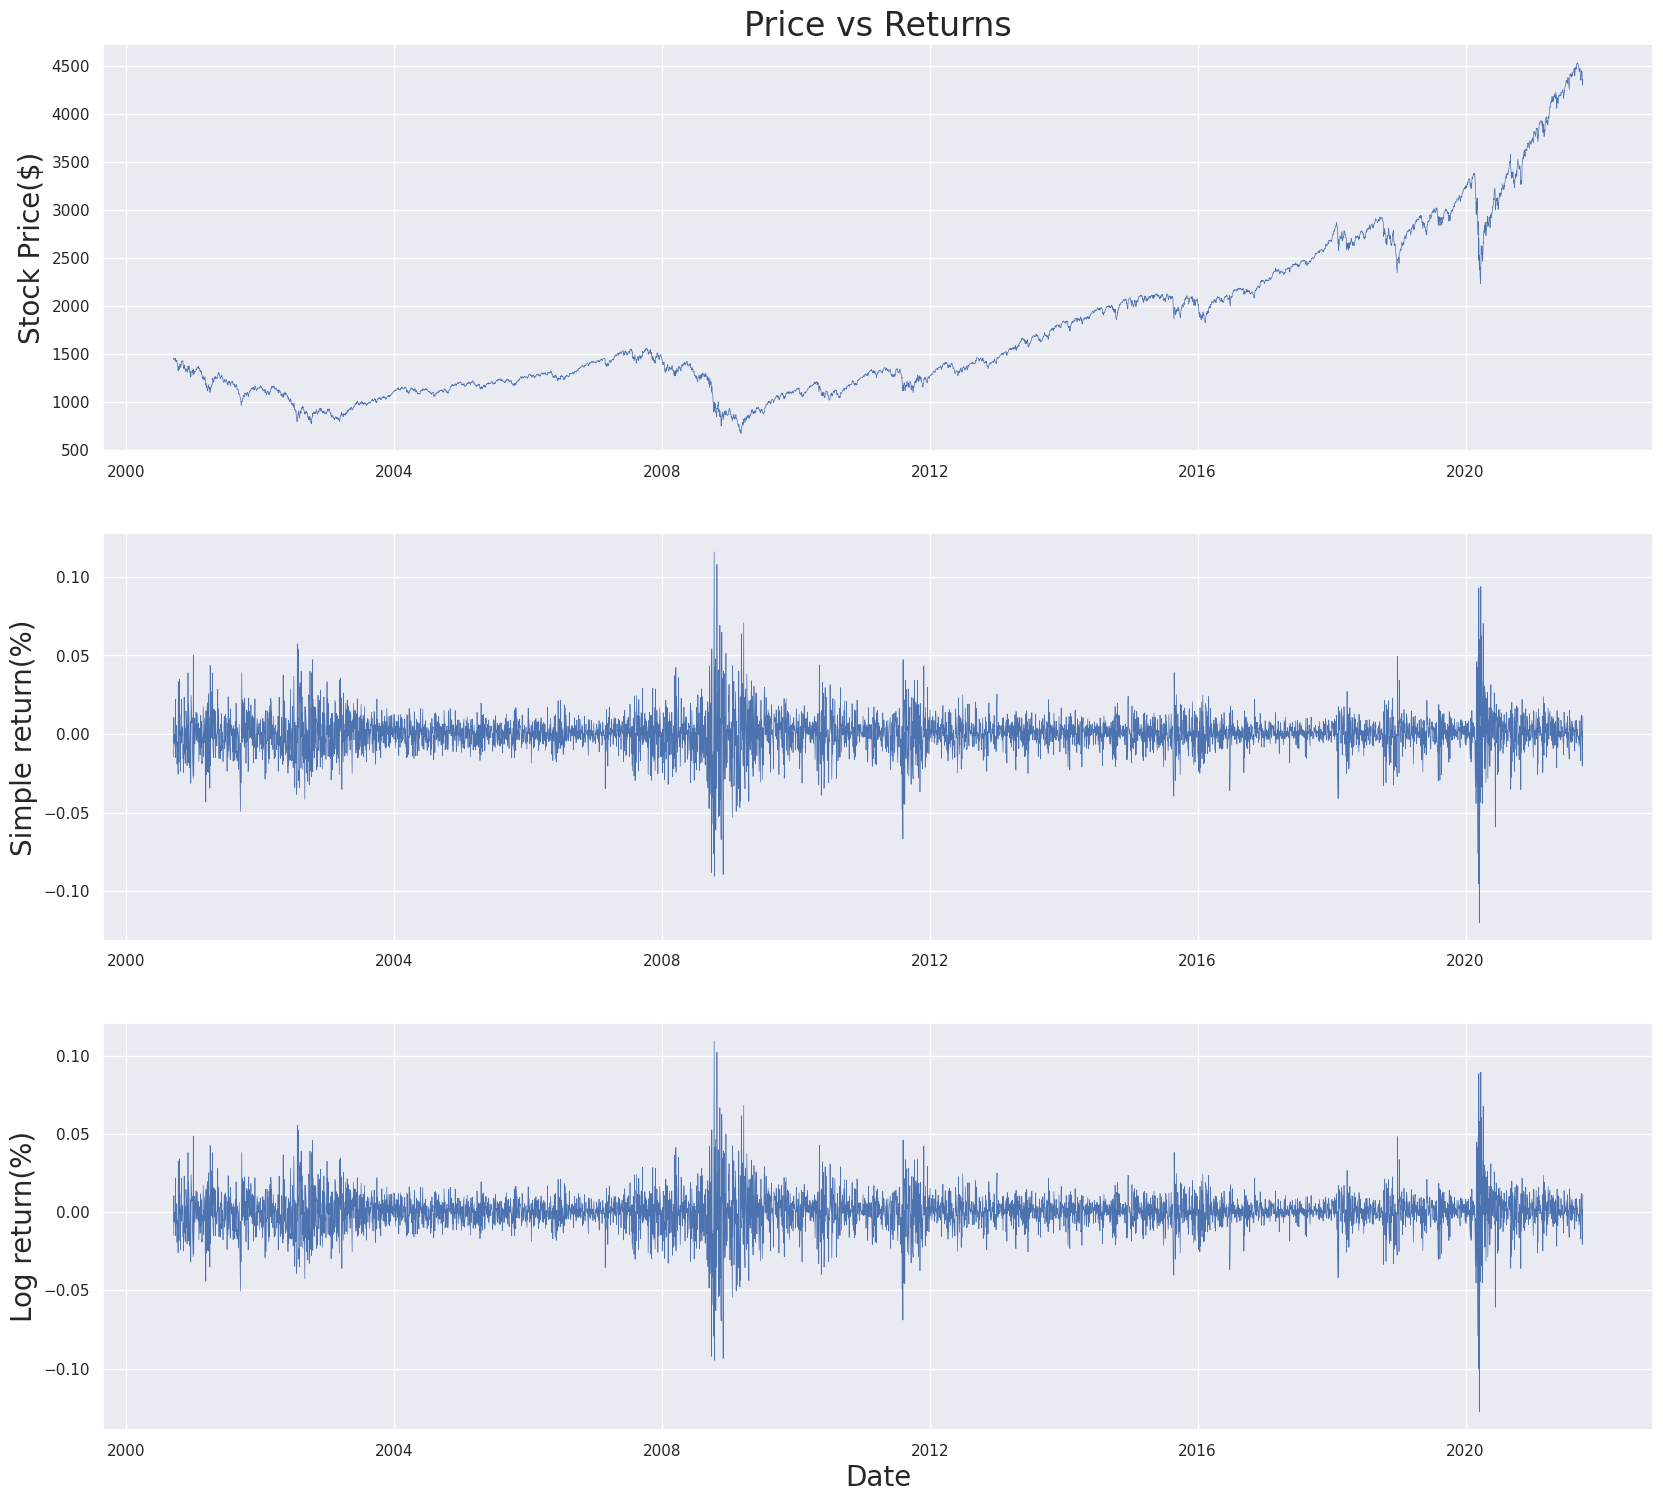

In [50]:
fig, ax = plt.subplots(nrows=3, figsize=(20,18))
ax[0].plot(df_spx['SPX'], linewidth=0.5)
ax[0].set_title('Price vs Returns', fontsize=24)
ax[0].set_ylabel('Stock Price($)', fontsize=20);
ax[1].plot(df_spx['simple'], linewidth=0.5)
ax[1].set_ylabel('Simple return(%)', fontsize=20);
ax[2].plot(df_spx['log'], linewidth=0.5)
ax[2].set_xlabel('Date', fontsize=20)
ax[2].set_ylabel('Log return(%)', fontsize=20);

Text(0.5, 1.0, 'Distribution of SPX returns')

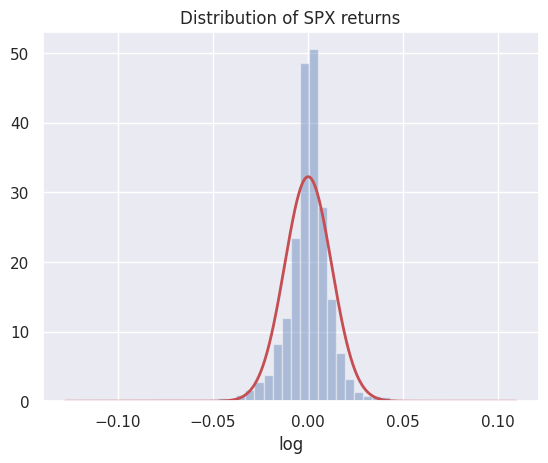

In [64]:
import scipy.stats as scs
df = df_spx
# Plotting the distribution of the returns ----
ax = sns.distplot(df.log, kde = False, norm_hist=True)

xx = np.linspace(min(df.log), max(df.log), num=1000)
yy = scs.norm.pdf(xx, loc=df.log.mean(), scale=df.log.std())
ax.plot(xx, yy, 'r', lw=2)
ax.set_title('Distribution of SPX returns')

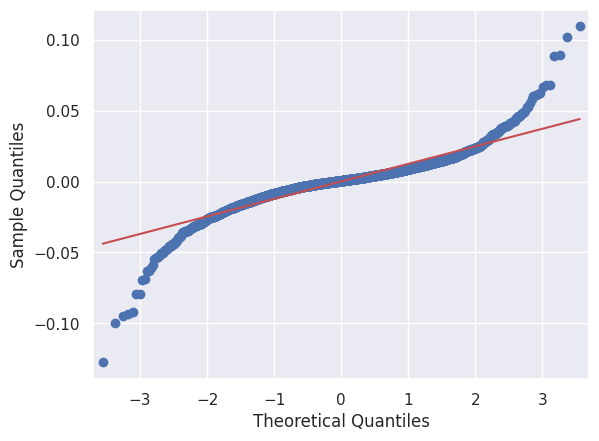

In [56]:
import statsmodels.api as sm
# QQ plot ----
qq = sm.qqplot(df.log.values, line='s')
qq.show()

In [59]:
# Descriptive statistics ----
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print('Mean: {0:.4f}'.format(df.log.mean()))
print('Median: {0:.4f}'.format(df.log.median()))
print('Min: {0:.4f}'.format(df.log.min()))
print('Max: {0:.4f}'.format(df.log.max()))
print('Standard Deviation: {0:.4f}'.format(df.log.std()))
print('Skewness: {0:.4f}'.format(df.log.skew()))
print('Kurtosis: {0:.4f}'.format(df.log.kurtosis())) #Kurtosis of std. Normal dist = 0
print('Jarque-Bera statistic: {stat:.2f} with p-value: {p_val:.2f}'.format(stat = scs.jarque_bera(df.log.values)[0],
                                                                           p_val = scs.jarque_bera(df.log.values)[1]))


Range of dates: 2000-09-18 - 2021-10-01
Number of observations: 5294
Mean: 0.0002
Median: 0.0006
Min: -0.1277
Max: 0.1096
Standard Deviation: 0.0124
Skewness: -0.4064
Kurtosis: 11.4986
Jarque-Bera statistic: 29249.89 with p-value: 0.00


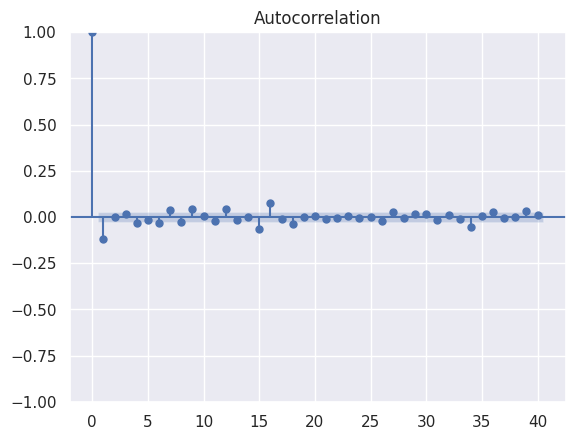

In [62]:
import statsmodels.tsa.api as smt
# Autocorrelation plot of log returns ----
acf_r = smt.graphics.plot_acf(df.log, lags=40 , alpha=0.05)
acf_r.show()

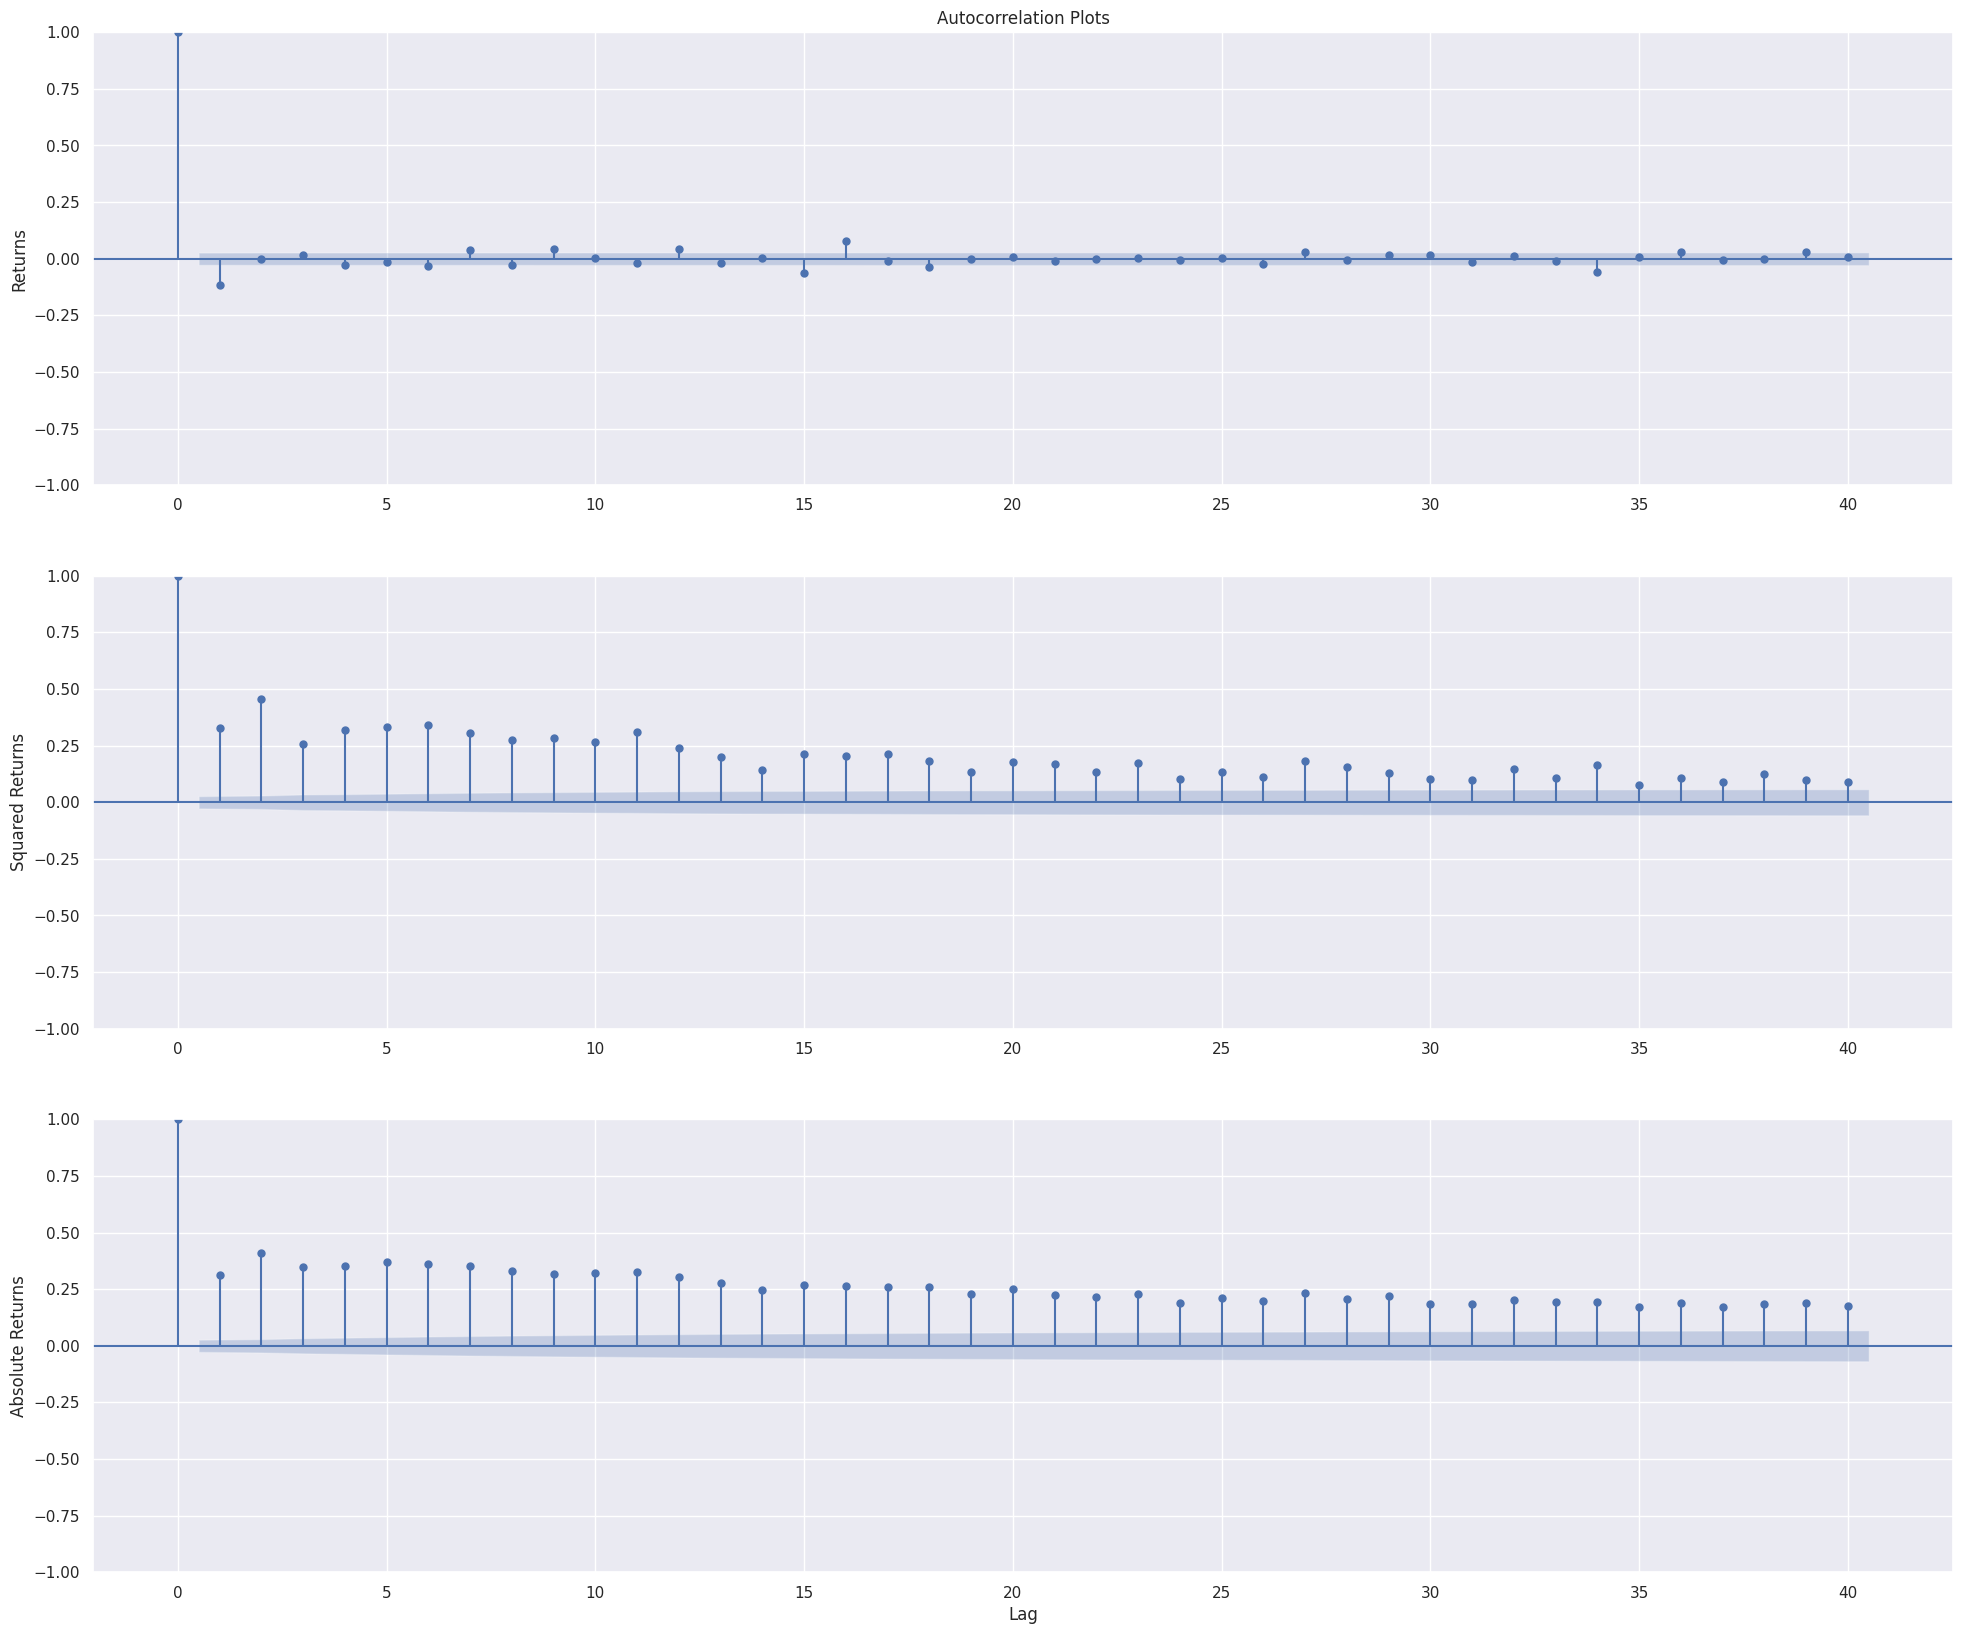

In [63]:
# Autocorrelation plot of log returns and squared/absolute versions ----

# specify the max amount of lags
lags = 40

fig, ax =plt.subplots(3, 1, figsize=(24, 20))
# returns ----
smt.graphics.plot_acf(df.log, lags=lags , alpha=0.05, ax = ax[0])
ax[0].set_ylabel('Returns')
ax[0].set_title('Autocorrelation Plots')
# squared returns ----
smt.graphics.plot_acf(df.log ** 2, lags=lags, alpha=0.05, ax = ax[1])
ax[1].set_ylabel('Squared Returns')
ax[1].set_xlabel('')
ax[1].set_title('')
# absolute returns ----
smt.graphics.plot_acf(np.abs(df.log), lags=lags, alpha=0.05, ax = ax[2])
ax[2].set_ylabel('Absolute Returns')
ax[2].set_title('')
ax[2].set_xlabel('Lag')
fig.show()